In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [120]:
from scipy.stats import chi2_contingency

In [156]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [11]:
market_2024 = pd.read_csv("2024marketdata.csv")

In [12]:
col_og = list(market_2024.columns)

In [13]:
df_index = [0, 1, 16, 18, 19, 24, 25, 26, 
            28, 31, 40, 50, 56, 57, 58]

In [14]:
[col_og[i] for i in df_index]

['Unnamed: 0',
 'Retail and food services sales, total',
 'Furniture stores',
 'Household appliance stores',
 'Electronics stores',
 'Food and beverage stores',
 'Grocery stores',
 'Supermarkets and other grocery (except convenience) stores',
 'Health and personal care stores',
 'Clothing and clothing access. stores',
 'Book stores',
 'Office supplies and stationery stores',
 'Food services and drinking places',
 'Restaurants and other eating places',
 'Limited service eating places']

In [29]:
new_col = ['month', 'retail_total', 'furniture', 'appliances',
            'electronics', 'food_stores', 'grocery', 'supermarket',
            'hp_care', 'clothes', 'books', 'stationary',
            'food_service', 'restaurants', 'ls_eating']

In [30]:
market_df_uncleaned = pd.DataFrame()
for i in range(len(new_col)):
    market_df_uncleaned[new_col[i]] = market_2024.iloc[:, df_index[i]]

In [31]:
type(market_df_uncleaned.books[1])

str

In [18]:
market_df_uncleaned

,month,retail_total,furniture,appliances,electronics,food_stores,grocery,supermarket,hp_care,clothes,books,stationary,food_service,restaurants,ls_eating
0,Jan. 2024,"637,342","5,589","1,622","5,572","79,813","72,636","69,450","36,394","19,188",802,733,"84,901","75,848","38,763"
1,Feb. 2024,"644,825","5,705","1,711","5,556","76,955","69,307","66,099","34,588","22,005",559,660,"89,297","79,515","39,745"
2,Mar. 2024,"707,637","5,995","1,769","5,439","83,248","74,795","71,342","36,238","24,986",596,661,"98,175","87,407","43,992"
3,Apr. 2024,"700,302","5,562","1,741","5,233","78,846","70,765","67,223","35,467","23,993",596,649,"94,883","83,956","43,230"
4,May 2024,"744,554","6,007","1,876","5,768","85,908","76,837","73,068","37,256","27,562",634,644,"100,711","89,624","45,620"
5,Jun. 2024,"701,555","5,885","1,858","5,423","82,828","73,990","70,383","35,656","25,121",593,596,"97,195","87,201","44,465"
6,Jul. 2024,"726,098","6,157","1,942","5,717","85,233","76,240","72,737","37,342","25,453",587,697,"96,789","87,472","45,004"
7,Aug. 2024,"733,560","6,333","1,902","5,753","85,262","76,348","72,877","38,044","27,215",881,874,"99,896","89,063","45,196"
8,Sep. 2024,"683,558","6,097","1,761","5,252","81,116","72,811","69,663","37,655","23,088",772,651,"93,781","82,318","41,668"
9,Oct. 2024,"730,720","6,033","1,799","5,564","84,687","75,931","72,693","39,693","25,318",590,629,"97,707","85,793","43,775"


In [19]:
#string :(
market_df_uncleaned.food_stores + market_df_uncleaned.grocery + market_df_uncleaned.supermarket

0          79,81372,63669,450
1          76,95569,30766,099
2          83,24874,79571,342
3          78,84670,76567,223
4          85,90876,83773,068
5          82,82873,99070,383
6          85,23376,24072,737
7          85,26276,34872,877
8          81,11672,81169,663
9          84,68775,93172,693
10         86,04276,58973,585
11         90,59578,84975,734
12    1,000,533895,098854,854
13      979,155877,382834,507
dtype: object

In [38]:
market_df = pd.DataFrame({'month':market_df_uncleaned.month})
for col in range(1, len(market_df_uncleaned.columns)):
    market_df[new_col[col]] = [int(i.replace(",", "")) for i in list(market_df_uncleaned[new_col[col]])]

In [39]:
market_df['retail_total'] = [int(i.replace(",", "")) for i in list(market_df.retail_total)]

AttributeError: 'int' object has no attribute 'replace'

In [40]:
market_df.head()

,month,retail_total,furniture,appliances,electronics,food_stores,grocery,supermarket,hp_care,clothes,books,stationary,food_service,restaurants,ls_eating
0,Jan. 2024,637342,5589,1622,5572,79813,72636,69450,36394,19188,802,733,84901,75848,38763
1,Feb. 2024,644825,5705,1711,5556,76955,69307,66099,34588,22005,559,660,89297,79515,39745
2,Mar. 2024,707637,5995,1769,5439,83248,74795,71342,36238,24986,596,661,98175,87407,43992
3,Apr. 2024,700302,5562,1741,5233,78846,70765,67223,35467,23993,596,649,94883,83956,43230
4,May 2024,744554,6007,1876,5768,85908,76837,73068,37256,27562,634,644,100711,89624,45620


In [41]:
# total spent at all grocery/food stores
market_df['grocery_agg'] = market_df.food_stores + market_df.grocery + market_df.supermarket

In [42]:
type(market_df.ls_eating[0])

numpy.int64

In [43]:
market_df['food_total'] = market_df.grocery_agg + market_df.food_service + market_df.restaurants + market_df.ls_eating

In [44]:
market_df['school_supplies'] = market_df.books + market_df.stationary

In [45]:
market_df

,month,retail_total,furniture,appliances,electronics,food_stores,grocery,supermarket,hp_care,clothes,books,stationary,food_service,restaurants,ls_eating,grocery_agg,food_total,school_supplies
0,Jan. 2024,637342,5589,1622,5572,79813,72636,69450,36394,19188,802,733,84901,75848,38763,221899,421411,1535
1,Feb. 2024,644825,5705,1711,5556,76955,69307,66099,34588,22005,559,660,89297,79515,39745,212361,420918,1219
2,Mar. 2024,707637,5995,1769,5439,83248,74795,71342,36238,24986,596,661,98175,87407,43992,229385,458959,1257
3,Apr. 2024,700302,5562,1741,5233,78846,70765,67223,35467,23993,596,649,94883,83956,43230,216834,438903,1245
4,May 2024,744554,6007,1876,5768,85908,76837,73068,37256,27562,634,644,100711,89624,45620,235813,471768,1278
5,Jun. 2024,701555,5885,1858,5423,82828,73990,70383,35656,25121,593,596,97195,87201,44465,227201,456062,1189
6,Jul. 2024,726098,6157,1942,5717,85233,76240,72737,37342,25453,587,697,96789,87472,45004,234210,463475,1284
7,Aug. 2024,733560,6333,1902,5753,85262,76348,72877,38044,27215,881,874,99896,89063,45196,234487,468642,1755
8,Sep. 2024,683558,6097,1761,5252,81116,72811,69663,37655,23088,772,651,93781,82318,41668,223590,441357,1423
9,Oct. 2024,730720,6033,1799,5564,84687,75931,72693,39693,25318,590,629,97707,85793,43775,233311,460586,1219


In [46]:
x = range(1, 12)
y = market_df.retail_total[0:11]/1000

y1 = market_df.food_total[0:11]/1000

In [47]:
market_df.month[0:11:2]

0     Jan. 2024
2     Mar. 2024
4      May 2024
6     Jul. 2024
8     Sep. 2024
10    Nov. 2024
Name: month, dtype: object

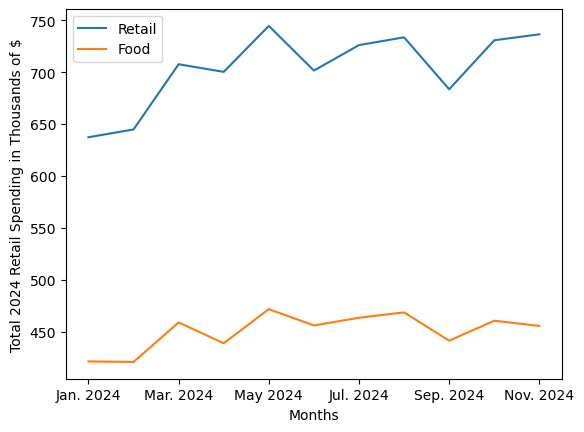

In [48]:
plt.plot(x, y, label = "Retail")
plt.plot(x, y1, label = "Food")
plt.xlabel("Months")
plt.xticks(range(1, 12, 2), market_df.month[0:11:2])
plt.ylabel("Total 2024 Retail Spending in Thousands of $")
plt.legend()
plt.show()

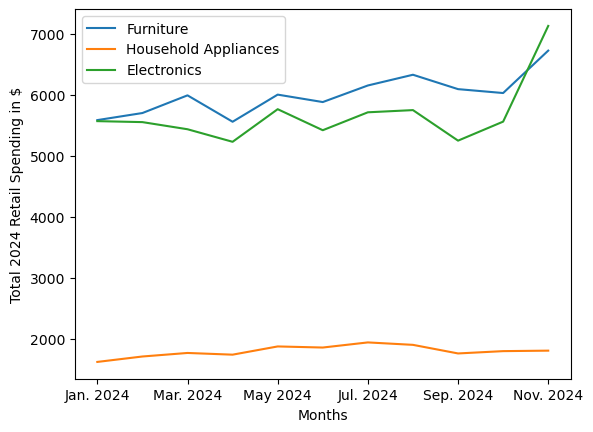

In [49]:
y2 = market_df.furniture[0:11]
y3 = market_df.appliances[0:11]
y4 = market_df.electronics[0:11]
plt.plot(x, y2, label = "Furniture")
plt.plot(x, y3, label = "Household Appliances")
plt.plot(x, y4, label = "Electronics")
plt.xlabel("Months")
plt.xticks(range(1, 12, 2), market_df.month[0:11:2])
plt.ylabel("Total 2024 Retail Spending in $")
plt.legend()
plt.show()

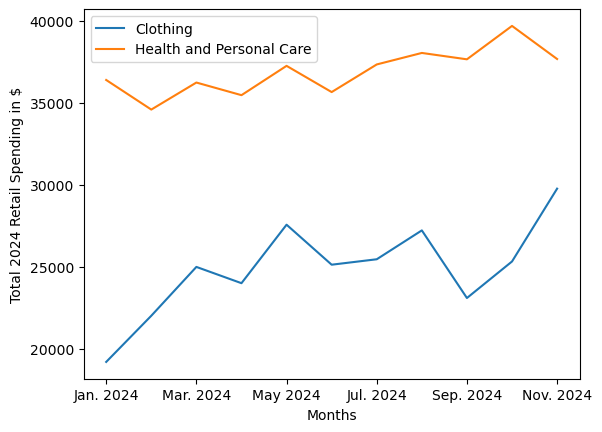

In [50]:
y5 = market_df.clothes[0:11]
y6 = market_df.hp_care[0:11]
plt.plot(x, y5, label = "Clothing")
plt.plot(x, y6, label = "Health and Personal Care")
plt.xlabel("Months")
plt.xticks(range(1, 12, 2), market_df.month[0:11:2])
plt.ylabel("Total 2024 Retail Spending in $")
plt.legend()
plt.show()

In [182]:
student_df = pd.read_csv('StudentMonthlyExpense.csv')

In [ ]:
student_df.head()

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0


In [233]:
student_df.Part_time_job.value_counts()

Part_time_job
No     69
Yes    31
Name: count, dtype: int64

<BarContainer object of 2 artists>

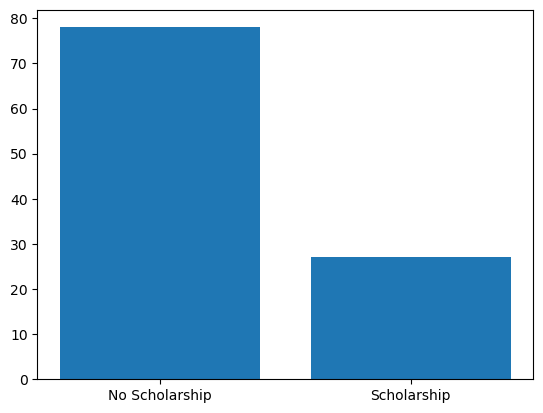

In [236]:
plt.bar(["No Scholarship", "Scholarship"], student_df.iloc[:,4].value_counts())

<BarContainer object of 3 artists>

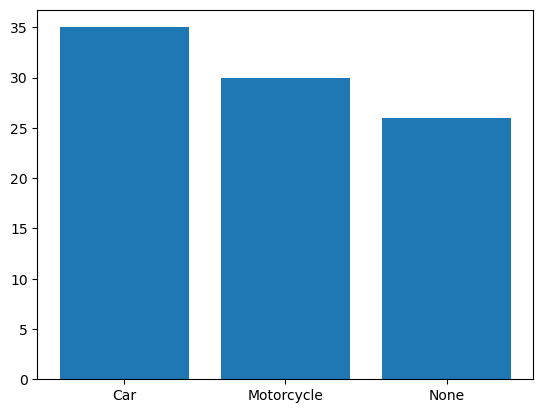

In [229]:
plt.bar(["Car", "Motorcycle", "None"], student_df.iloc[:,6].value_counts())

In [ ]:
pd.pivot_table(student_df, values='', index=['A', 'B'],
                       columns=['C'], aggfunc="sum")

In [131]:
d_cat = {i:[] for i in student_df.columns[4:11]}

for row in range(len(student_df)):
    for col in range(4, 11):
        if (student_df.iloc[row,col] == "No") | (student_df.iloc[row,col] == student_df.iloc[-1]['Cosmetics_&_Self-care']):
            d_cat[student_df.columns[col]].append(1)
        else:
            d_cat[student_df.columns[col]].append(2)

In [132]:
df_cat = pd.DataFrame(d_cat)

In [133]:
df_cat

,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care
0,1,1,1,1,1,1,2
1,1,2,2,1,1,2,2
2,2,1,1,1,1,1,1
3,1,1,2,1,1,2,2
4,1,1,2,1,1,1,2
...,...,...,...,...,...,...,...
100,1,1,2,1,1,2,2
101,1,1,2,1,1,1,2
102,1,2,2,2,2,2,1
103,2,1,1,1,1,2,1


In [134]:
X = df_cat.copy()
y = X.pop("Scholarship")

In [ ]:
features = ['Part_time_job', 'Transporting', 'Games_&_Hobbies',
            'Cosmetics_&_Self-care']


# Standardize
X_scaled = X.loc[:, features]


# YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype("category") 

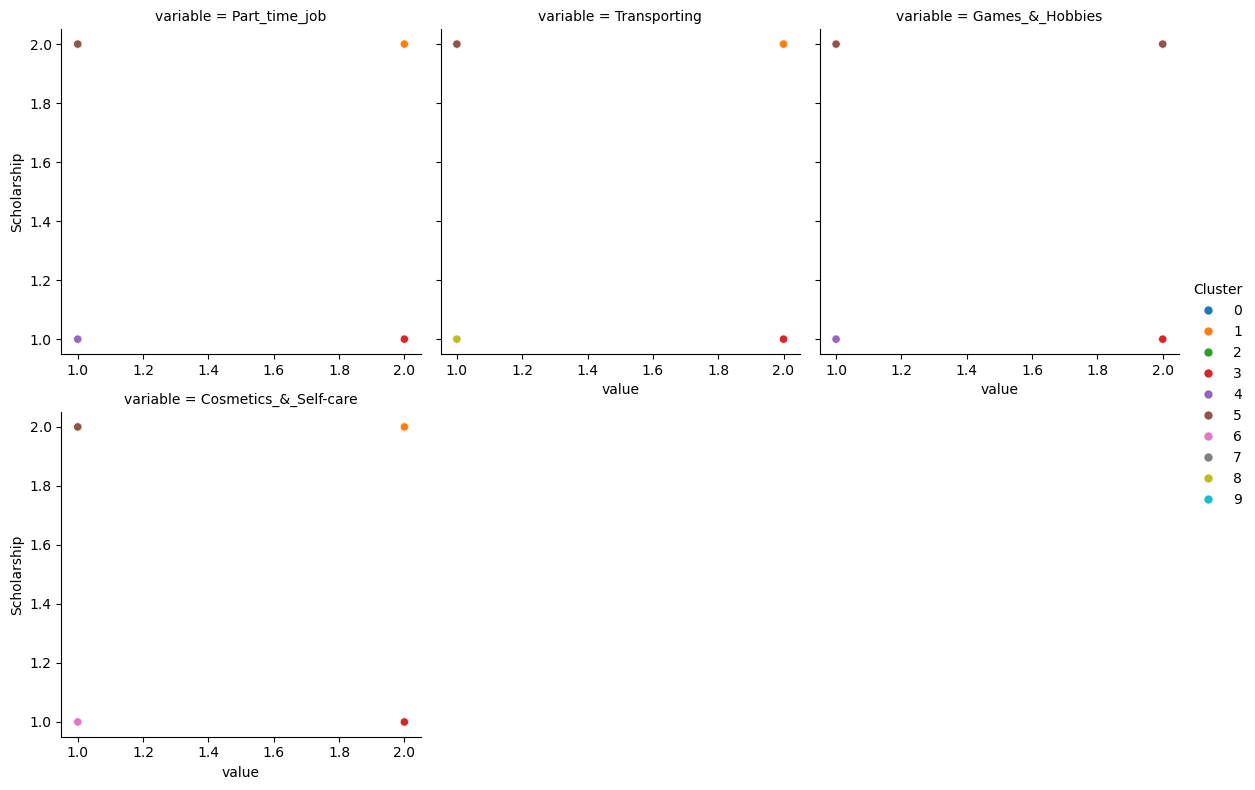

In [136]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["Scholarship"] = y
sns.relplot(
    x="value", y="Scholarship", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["Scholarship", "Cluster"],
    ),
);

In [141]:
stat, p, dof, expected = chi2_contingency([df_cat['Scholarship'], df_cat['Part_time_job']])
alpha = 0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Independent (H0 holds true)


In [142]:
p

np.float64(1.0)

In [143]:
stat

np.float64(12.717117988394584)

In [148]:
df_cat

,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care
0,1,1,1,1,1,1,2
1,1,2,2,1,1,2,2
2,2,1,1,1,1,1,1
3,1,1,2,1,1,2,2
4,1,1,2,1,1,1,2
...,...,...,...,...,...,...,...
100,1,1,2,1,1,2,2
101,1,1,2,1,1,1,2
102,1,2,2,2,2,2,1
103,2,1,1,1,1,2,1


In [254]:
X = df_cat.iloc[:, [0, 1,2, 6]]

In [255]:
X

,Scholarship,Part_time_job,Transporting,Cosmetics_&_Self-care
0,1,1,1,2
1,1,2,2,2
2,2,1,1,1
3,1,1,2,2
4,1,1,2,2
...,...,...,...,...
100,1,1,2,2
101,1,1,2,2
102,1,2,2,1
103,2,1,1,1


In [256]:
y = X.pop("Scholarship")

In [257]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [258]:
student_model= DecisionTreeRegressor(random_state = 1)
student_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [259]:
val_predictions = student_model.predict(val_X)

In [260]:
val_predictions

array([1.14285714, 1.71428571, 1.14285714, 1.35      , 1.10526316,
       1.14285714, 1.        , 1.14285714, 1.35      , 1.71428571,
       1.71428571, 1.71428571, 1.35      , 1.35      , 1.10526316,
       1.35      , 1.35      , 1.10526316, 1.35      , 1.14285714,
       1.35      , 1.09090909, 1.10526316, 1.14285714, 1.71428571,
       1.14285714, 1.10526316])

In [261]:
np.array(val_y) - val_predictions

array([-0.14285714, -0.71428571, -0.14285714,  0.65      , -0.10526316,
       -0.14285714,  0.        , -0.14285714,  0.65      ,  0.28571429,
        0.28571429,  0.28571429, -0.35      , -0.35      , -0.10526316,
        0.65      , -0.35      , -0.10526316, -0.35      , -0.14285714,
       -0.35      ,  0.90909091, -0.10526316, -0.14285714,  0.28571429,
       -0.14285714, -0.10526316])

In [262]:
val_mae = mean_absolute_error(val_y, val_predictions)
val_mae

0.2960203539150908

In [263]:
X2 = df_cat.iloc[:, [0, 3, 4, 5, 6]]
y2 = X2.pop("Scholarship")
train_X, val_X, train_y, val_y = train_test_split(X2, y2, random_state = 1)
student_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [264]:
X2.head()

,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care
0,1,1,1,2
1,1,1,2,2
2,1,1,1,1
3,1,1,2,2
4,1,1,1,2


In [268]:
val_predictions = student_model.predict(val_X)

In [269]:
val_mae = mean_absolute_error(val_y, val_predictions)
val_mae

0.3232884399551067

In [213]:
X3 = df_cat.iloc[:, [0, 5, 6]]
y3 = X3.pop("Scholarship")
train_X, val_X, train_y, val_y = train_test_split(X3, y3, random_state = 1)
student_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [214]:
val_predictions = student_model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
val_mae

0.34050637089852775

In [206]:
train_Xc, val_Xc, train_yc, val_yc = train_test_split(X_cat, y_cat, random_state = 1)

In [207]:
student_modelc= DecisionTreeRegressor(random_state = 1)
student_modelc.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [237]:
student_df.head()

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0


In [242]:
student_df.groupby('Scholarship').Part_time_job.value_counts()

Scholarship  Part_time_job
No           No               54
             Yes              19
Yes          No               15
             Yes              12
Name: count, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

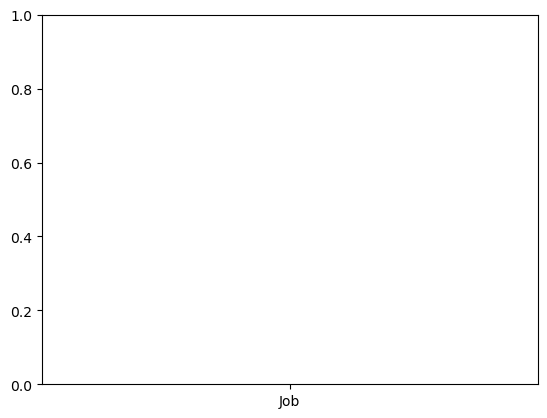

In [244]:
plt.bar(["Job", "No Job"], student_df.groupby('Scholarship').Part_time_job.value_counts())